# Future Chanpagne sales forecast

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and exploring Data

In [2]:
df = pd.read_csv("champagne data.csv")
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.shape

(107, 2)

In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
df.columns=["Month","Sales"]     # changing column name
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.drop([105,106], axis="rows", inplace = True)

In [7]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
Month    105 non-null object
Sales    105 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.1+ KB


# Formating data

In [9]:
df["Month"]=pd.to_datetime(df["Month"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
Month    105 non-null datetime64[ns]
Sales    105 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [11]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [12]:
df.set_index("Month", inplace=True)
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [13]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Visualize data

c:\users\brarb\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


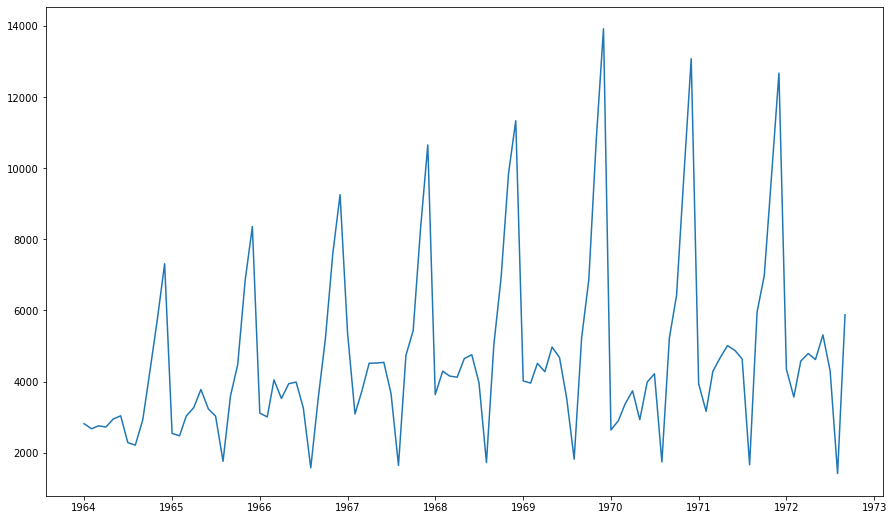

In [14]:
plt.figure(figsize=(15,9))
plt.plot(df)

By pondering on correlogram we can note that it is seasonal data and little upward trending

In [42]:
### Testing For Stationarity by dicky fuller test

from statsmodels.tsa.stattools import adfuller

In [16]:
test_result=adfuller(df['Sales'])

In [43]:
#Hypothesis testing
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [18]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276213
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Differencing

In [19]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [20]:
df['Sales'].shift(1)  

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

Seconal cycle repeat after 1 year or 12 months, so we shift it for 12 records.

In [21]:
df['Sales second Difference'] = df['Sales'] - df['Sales'].shift(12)

In [22]:
df.head(15)

,Sales,Sales First Difference,Sales second Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [23]:
## Again test dickey fuller test
adfuller_test(df['Sales second Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


c:\users\brarb\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
c:\users\brarb\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
c:\users\brarb\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
c:\users\brarb\appdata\local\programs\python\p

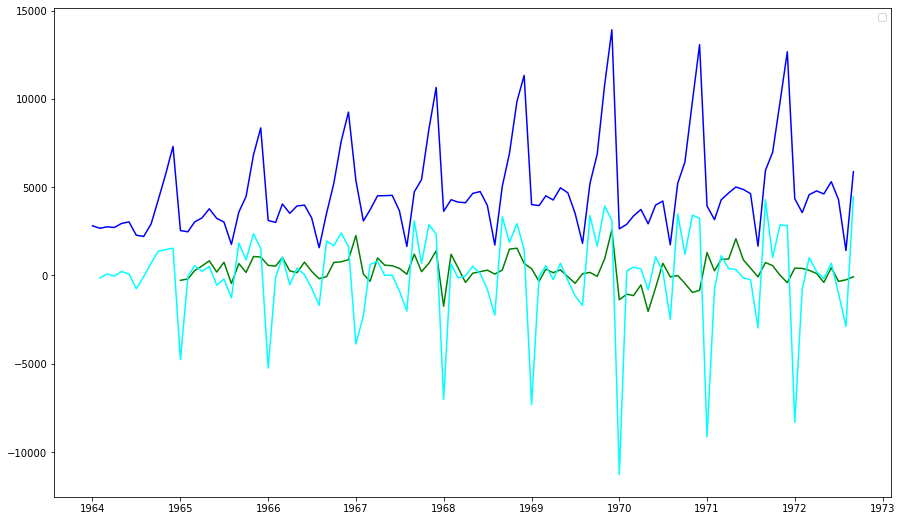

In [24]:
plt.figure(figsize=(15,9))
plt.plot(df["Sales second Difference"], color="green")
plt.plot(df["Sales First Difference"], color="aqua")
plt.plot(df["Sales"],color="blue")
plt.legend("sale", "control")
plt.show()

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

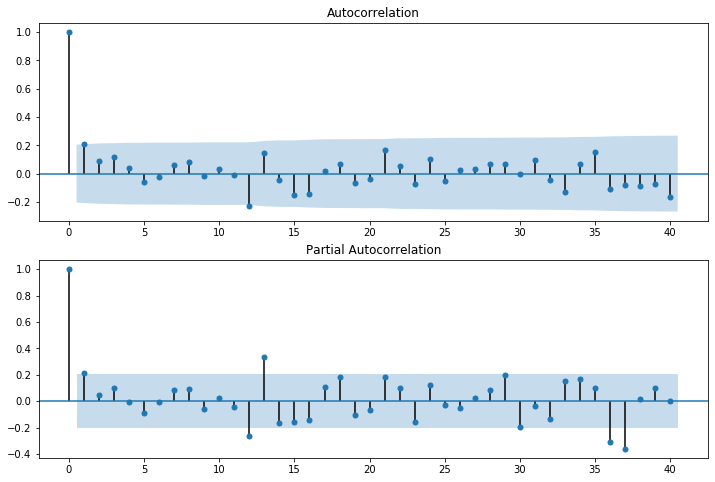

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Sales second Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Sales second Difference'].iloc[13:],lags=40,ax=ax2)

In [27]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

c:\users\brarb\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


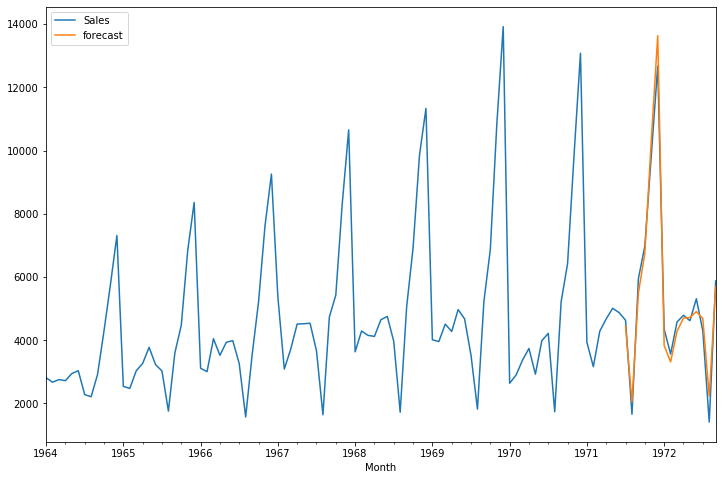

In [33]:
df['forecast']=results.predict(start=90,end=105,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [34]:
df.tail(20)

,Sales,Sales First Difference,Sales second Difference,forecast
Month,,,,
1971-02-01,3162.0,-772.0,263.0,NaN
1971-03-01,4286.0,1124.0,916.0,NaN
1971-04-01,4676.0,390.0,936.0,NaN
1971-05-01,5010.0,334.0,2083.0,NaN
1971-06-01,4874.0,-136.0,888.0,NaN
1971-07-01,4633.0,-241.0,416.0,4437.324999
1971-08-01,1659.0,-2974.0,-79.0,2050.747686
1971-09-01,5951.0,4292.0,730.0,5493.376610
1971-10-01,6981.0,1030.0,557.0,6752.038836


In [32]:
df.shape

(105, 4)

In [45]:
import pickle
with open('chanpayne sale forcast.pickle','wb') as f:
    pickle.dump(model,f)